# Read Train data

In [ ]:
# !pip uninstall xgboost
# !pip install xgboost
# !pip uninstall imblearn
# !pip install imblearn

In [ ]:
import pandas as pd

In [ ]:
# price gram w2v
result = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Train_result/price+gram+w2v_improved.csv')

In [ ]:
# topics
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Train_result/LDA-final-matched.csv')
# tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Train_result/matched_topics.csv')
# feature names
for i in range(30):
  col_name = 'topic'+str(i)
  tmp[col_name] = tmp[str(i)]
  tmp = tmp.drop(columns = str(i))
result = pd.concat([result,tmp], axis=1)

In [ ]:
# sentiment
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Train_result/matched_sentiment.csv')
result = pd.concat([result,tmp], axis=1)

In [ ]:
# ratios
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Train_result/matched_ratios.csv')
result = pd.concat([result,tmp], axis=1)

In [ ]:
# fundamentals
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Train_result/matched_fundamentals.csv')
result = pd.concat([result,tmp], axis=1)

In [ ]:
# index indicators
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Train_result/matched_indices.csv')
result = pd.concat([result,tmp], axis=1)

In [ ]:
result = result.drop(columns='Unnamed: 0')
result = result.drop(columns='Unnamed: 0.1')

In [ ]:
len(result)

914950

In [ ]:
list(result.columns)

['tic',
 'datadate',
 'cshoc',
 'cshtrd',
 'eps',
 'prccd',
 'close_price_lag_1',
 'retweets',
 'replies',
 'likes',
 'is_retweet',
 'g1',
 'g2',
 'g3',
 'g4',
 'g5',
 'g6',
 'n_word',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115

In [ ]:
len(result.columns)

413

# Setup y

In [ ]:
# setting y
# result['y'] = result['3_day_change'].apply(lambda x: 1 if x>=0.05 else (2 if x<=-0.05 else 0))
result['y'] = result['3_day_change'].apply(lambda x: 1 if x>=0.05 else 0)

In [ ]:
print(len(result[result['y'] == 0]))
print(len(result[result['y'] == 1]))
print(len(result[result['y'] == 2]))

833733
81217
0


In [ ]:
# datetime transform 
result['datadate'] = pd.to_datetime(result['datadate'],format='%Y-%m-%d')

# XGboost

In [ ]:
from datetime import datetime
split_time = datetime.strptime("2019-01-01","%Y-%m-%d")
train = result[result['datadate'] < split_time]
test = result[result['datadate'] >= split_time]

# train
X_train = train.drop(columns=['prccd','y'])            
y_train = train['y']

#test
X_test = test.drop(columns=['prccd','y'])            
y_test = test['y']

# keep tic, datadate, 3_day_change columns in X train and test
X_train_keep = X_train.copy()
X_test_keep = X_test.copy()

X_train = X_train.drop(columns = ['tic', 'datadate', '3_day_change'])
X_test = X_test.drop(columns = ['tic', 'datadate', '3_day_change'])

from collections import Counter
print('Resampled dataset shape %s' % Counter(y_test))

Resampled dataset shape Counter({0: 156636, 1: 17881})


In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# # keep tic, datadate, 3_day_change columns in X
# X = result.drop(columns=['prccd','y'])            
# y = result['y']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, shuffle = False, random_state=7012)

# # keep tic, datadate, 3_day_change columns in X train and test
# X_train_keep = X_train.copy()
# X_test_keep = X_test.copy()

# X_train = X_train.drop(columns = ['tic', 'datadate', '3_day_change'])
# X_test = X_test.drop(columns = ['tic', 'datadate', '3_day_change'])

# from collections import Counter
# print('Resampled dataset shape %s' % Counter(y_test))

In [ ]:
# y_train = y_train[X_train.isnull().sum(axis = 1) == 0]
# len(y_train)

In [ ]:
# X_train = X_train.dropna()
# len(X_train)

In [ ]:
# # oversample SMOTE
# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(ratio='auto',k_neighbors=5, n_jobs=-1, random_state=7012)
# X_Oresampled, y_Oresampled = sm.fit_resample(X_train, y_train)

# from collections import Counter
# print('Resampled dataset shape %s' % Counter(y_Oresampled))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(tree_method = "gpu_hist",n_estimators = 18888, random_state=7012,
                    # verbose_eval=True, 
                    # eval_metric = 'aucpr', early_stopping_rounds = 88, 
                    # eval_set = [(X_train, y_train), 
                    #             (X_test, y_test)]
                    )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=18888, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=7012,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8972134519846204

In [ ]:
print(len(y_test[y_test == 0]))
print(len(y_test[y_test == 1]))
print(len(y_test[y_test== 2]))

156636
17881
0


In [ ]:
print(len(y_pred[y_pred == 0]))
print(len(y_pred[y_pred == 1]))
print(len(y_pred[y_pred== 2]))

173808
709
0


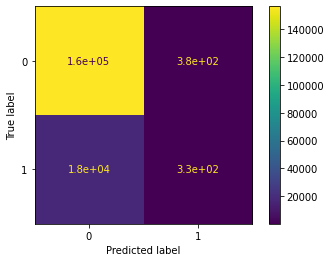

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot() 

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

0.7071456640519342

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.035072619688004306

In [ ]:
y_pred_prob = pd.DataFrame()
y_pred_prob['%'] = list(xgb.predict_proba(X_test)[:, 1])

In [ ]:
y_pred_prob['actual'] = list(y_test)
y_pred_prob['3_day_change'] = X_test_keep['3_day_change'].tolist()
y_pred_prob['tic'] = X_test_keep['tic'].tolist()
y_pred_prob['datadate'] = X_test_keep['datadate'].tolist()

In [ ]:
test = y_pred_prob[y_pred_prob['%'] > 0.5]

In [ ]:
test[test['actual'] == 0]

,%,actual,3_day_change,tic,datadate
249,0.500562,0,-0.129685,NVAX,2019-03-05
255,0.674379,0,-0.009129,NVAX,2019-03-13
1456,0.537661,0,0.038158,RDFN,2019-01-04
1674,0.750216,0,0.032606,RH,2019-01-16
1675,0.593656,0,0.007637,RH,2019-01-17
...,...,...,...,...,...
173180,0.571096,0,0.033943,SCPH,2019-01-04
173459,0.679009,0,-0.072289,CWBR,2019-01-04
173653,0.593019,0,-0.121556,AVCO,2019-01-29
174390,0.685324,0,-0.096618,AYTU,2019-04-16


In [ ]:
test[test['actual'] == 1]

,%,actual,3_day_change,tic,datadate
2,0.822348,1,0.126866,PLUG,2019-01-04
102,0.592099,1,0.157326,PENN,2019-01-02
208,0.687183,1,0.127451,NVAX,2019-01-03
209,0.591511,1,0.060748,NVAX,2019-01-04
225,0.571989,1,0.055046,NVAX,2019-01-29
...,...,...,...,...,...
174358,0.613584,1,0.224138,AYTU,2019-03-01
174364,0.568613,1,0.111111,AYTU,2019-03-11
174369,0.667712,1,0.104651,AYTU,2019-03-18
174397,0.589600,1,0.076210,AYTU,2019-04-29


In [ ]:
feature_imp = pd.DataFrame()
feature_imp['features'] = list(xgb.get_booster().feature_names)
feature_imp['%'] = list(xgb.feature_importances_)

In [ ]:
feature_imp.sort_values(by=['%'],ascending=False).head(20)

,features,%
392,niy,0.035099
377,dvy,0.024450
395,oepsxy,0.019152
396,oiadpy,0.018455
2,eps,0.009280
408,vix,0.007887
113,98,0.007882
8,g1,0.007599
406,sp500,0.007339
407,rus2000,0.007270


In [ ]:
# output tickers

In [ ]:
tic = pd.DataFrame()
tmp = list(result['tic'].drop_duplicates())
tic['tic'] = tmp
tic = tic.reset_index().drop(columns = 'index')

In [ ]:
# tic.to_csv('/content/drive/MyDrive/Social Media Group /Data/Train_result/ticker.csv')

# strategy analysis

In [ ]:
test[test['3_day_change'] < 0].sort_values(by=['3_day_change'],ascending=True)

,%,actual,3_day_change,tic,datadate
94428,0.549411,0,-0.516513,ARLO,2019-02-05
159631,0.548635,0,-0.421103,LJPC,2019-01-04
51549,0.534722,0,-0.319853,CALX,2019-02-05
162893,0.531096,0,-0.240583,CFRX,2019-02-04
106482,0.522770,0,-0.193255,SGH,2019-01-04
...,...,...,...,...,...
149339,0.732204,0,-0.002646,UTI,2019-01-04
90723,0.653891,0,-0.002398,CBB,2019-01-31
141975,0.557928,0,-0.001984,WTI,2019-01-31
99932,0.539988,0,-0.000656,SLCA,2019-02-19


In [ ]:
test[test['3_day_change'] >= 0].sort_values(by=['3_day_change'],ascending=False)

,%,actual,3_day_change,tic,datadate
43452,0.702407,1,1.870722,AXSM,2019-01-04
68029,0.685960,1,1.014978,MGNX,2019-02-04
123010,0.523390,1,0.887500,VHC,2019-01-03
126650,0.612644,1,0.872180,IVC,2019-02-13
76690,0.592527,1,0.724684,AMRS,2019-02-04
...,...,...,...,...,...
152339,0.515333,0,0.000000,ALSK,2019-03-05
22994,0.771757,0,0.000000,HL,2019-01-31
96427,0.671838,0,0.000000,VBIV,2019-01-25
126938,0.552507,0,0.000000,VSTM,2019-02-07


# Trading Simulation

In [ ]:
X_test_change = X_test_keep[['tic', 'datadate', '3_day_change']]

In [ ]:
# get trading days
trading_days = X_test_keep.drop_duplicates(subset=['datadate']).sort_values(by='datadate')['datadate'].tolist()

In [ ]:
# invest and send out trading return (or loss)
def invest(X_test_keep,xgb,fund,tday):
  X_info = X_test_keep[X_test_keep['datadate'] == tday]
  X_input = X_info.drop(columns = ['tic','datadate','3_day_change'])
  X_pc = X_info[['tic','datadate','3_day_change']]
  # run model to make investment decision
  X_pc['%'] = list(xgb.predict_proba(X_input)[:, 1])
  # invest policy: model confidence > 50% 
  invested = X_pc[X_pc['%'] > 0.5]
  # calculate return 
  if len(invested) > 0:
    fund_part = fund/len(invested)
    fund_after = 0
    for i in range(len(invested)):
      change = invested['3_day_change'].iloc[i]
      fund_after = fund_after + fund_part * (1+change)
    fund = fund_after
  else:
    fund = fund
  return fund

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# simulation of tradings
fund1 = 10000
fund2 = 10000
fund3 = 10000
counter = 1
record1 = list()
record2 = list()
record3= list()
record_day = list()
for tday in trading_days:
  if (counter-1)%3 == 0:
    fund1 = invest(X_test_keep,xgb,fund1,tday)
  if (counter-2)%3 == 0:
    fund2 = invest(X_test_keep,xgb,fund2,tday)
  if (counter)%3 == 0:
    fund3 = invest(X_test_keep,xgb,fund3,tday)
  record_day.append(tday)
  record1.append(fund1)
  record2.append(fund2)
  record3.append(fund3)
  counter+=1
  print("{} --- fund1: {}, fund2: {}, fund3: {}".format(tday,fund1,fund2,fund3))

2019-01-02 00:00:00 --- fund1: 10961.33587776135, fund2: 10000, fund3: 10000
2019-01-03 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10000
2019-01-04 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10671.93492781224
2019-01-07 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10671.93492781224
2019-01-08 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10671.93492781224
2019-01-09 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10671.93492781224
2019-01-10 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10671.93492781224
2019-01-11 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10671.93492781224
2019-01-14 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10671.93492781224
2019-01-15 00:00:00 --- fund1: 10961.33587776135, fund2: 11827.735828566407, fund3: 10671.93492781224
2019-01-16 00:00:

In [ ]:
invest_result = pd.DataFrame()
invest_result['d'] = record_day
invest_result['1'] = record1
invest_result['2'] = record2
invest_result['3'] = record3

In [ ]:
invest_result

,d,1,2,3
0,2019-01-02,10961.335878,10000.000000,10000.000000
1,2019-01-03,10961.335878,11827.735829,10000.000000
2,2019-01-04,10961.335878,11827.735829,10671.934928
3,2019-01-07,10961.335878,11827.735829,10671.934928
4,2019-01-08,10961.335878,11827.735829,10671.934928
...,...,...,...,...
100,2019-05-28,18573.792083,27129.998564,37444.336725
101,2019-05-29,18573.792083,27129.998564,37444.336725
102,2019-05-30,18573.792083,27129.998564,37444.336725
103,2019-05-31,18573.792083,27129.998564,37444.336725


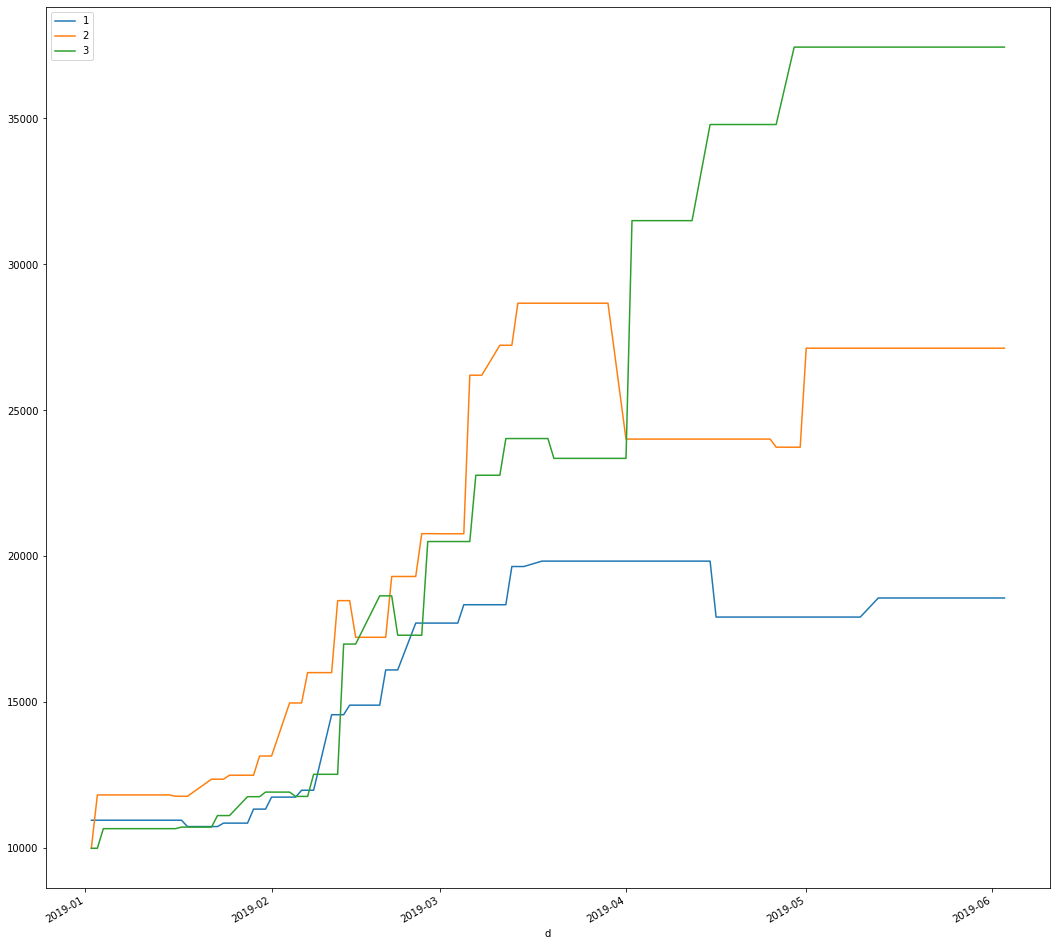

In [ ]:
invest_result.plot(x='d',y=['1','2','3'],figsize = (18,18))

In [ ]:
(fund1+fund2+fund3)/30000 - 1

1.771604245737453

# Real Trading (Using Test data 2019-06-01 - 2019-12-31)

## Read Test Data

In [ ]:
result_test = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/topic_modeling_test.csv')
result_test = result_test.drop(columns = ['Unnamed: 0','text'])

In [ ]:
# gram
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Test_result/matched_gram_feature_test.csv')
tmp = tmp.drop(columns = ['Unnamed: 0','tic','datadate'])
result_test = pd.concat([result_test,tmp], axis=1)

In [ ]:
# w2v
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Test_result/w2v_test.csv')
tmp = tmp.drop(columns = ['Unnamed: 0','tic','datadate','cshoc','cshtrd','eps','prccd','3_day_change','close_price_lag_1',
                          'text','retweets','replies','likes','is_retweet',])
result_test = pd.concat([result_test,tmp], axis=1)

In [ ]:
# topics
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Test_result/matched_topics_test.csv')
tmp = tmp.drop(columns = ['Unnamed: 0'])
# feature names
for i in range(30):
  col_name = 'topic'+str(i)
  tmp[col_name] = tmp[str(i)]
  tmp = tmp.drop(columns = str(i))
result_test = pd.concat([result_test,tmp], axis=1)

In [ ]:
# sentiment
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Test_result/matched_sentiment_test.csv')
tmp = tmp.drop(columns = ['Unnamed: 0','tic','datadate'])
result_test = pd.concat([result_test,tmp], axis=1)

In [ ]:
# ratios
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Test_result/matched_ratios_test.csv')
tmp = tmp.drop(columns = ['Unnamed: 0'])
result_test = pd.concat([result_test,tmp], axis=1)

In [ ]:
# fundamentals
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Test_result/matched_fundamentals_test.csv')
tmp = tmp.drop(columns = ['Unnamed: 0'])
result_test = pd.concat([result_test,tmp], axis=1)

In [ ]:
# index indicators
tmp = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/Test_result/matched_indices_test.csv')
tmp = tmp.drop(columns = ['Unnamed: 0'])
result_test = pd.concat([result_test,tmp], axis=1)

In [ ]:
print(len(result_test))
result_test.columns

255925


Index(['tic', 'datadate', 'cshoc', 'cshtrd', 'eps', 'prccd', '3_day_change',
       'close_price_lag_1', 'retweets', 'replies',
       ...
       'saley', 'spiy', 'txbcofy', 'txty', 'xidoy', 'xiy', 'xopry', 'sp500',
       'rus2000', 'vix'],
      dtype='object', length=413)

In [ ]:
# datetime transform 
result_test['datadate'] = pd.to_datetime(result_test['datadate'],format='%Y-%m-%d')

In [ ]:
from datetime import datetime
july_time = datetime.strptime("2019-07-01","%Y-%m-%d")
result_test = result_test[result_test['datadate'] >= july_time]

## Setup y

In [ ]:
# setting y (>=5% 3-day-return)
# result['y'] = result['3_day_change'].apply(lambda x: 1 if x>=0.05 else (2 if x<=-0.05 else 0))
result_test['y'] = result_test['3_day_change'].apply(lambda x: 1 if x>=0.05 else 0)

In [ ]:
print(len(result_test[result_test['y'] == 0]))
print(len(result_test[result_test['y'] == 1]))
print(len(result_test[result_test['y'] == 2]))

197560
23065
0


## Clean train and test data

In [ ]:
# train and test data
train = result
test = result_test

# train
X_train = train.drop(columns=['prccd','y'])            
y_train = train['y']

#test
X_test = test.drop(columns=['prccd','y'])            
y_test = test['y']

# keep tic, datadate, 3_day_change columns in X train and test
X_train_keep = X_train.copy()
X_test_keep = X_test.copy()

X_train = X_train.drop(columns = ['tic', 'datadate', '3_day_change'])
X_test = X_test.drop(columns = ['tic', 'datadate', '3_day_change'])

from collections import Counter
print('Resampled dataset shape %s' % Counter(y_test))

Resampled dataset shape Counter({0: 197560, 1: 23065})


## XGBoost

In [ ]:
xgb_test = XGBClassifier(tree_method = "gpu_hist",n_estimators = 18888, random_state=7012,
                    # verbose_eval=True, 
                    # eval_metric = 'aucpr', early_stopping_rounds = 88, 
                    # eval_set = [(X_train, y_train), 
                    #             (X_test, y_test)]
                    )
xgb_test.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=18888, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=7012,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
y_pred = xgb_test.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7589439093484419

In [ ]:
print(len(y_test[y_test == 0]))
print(len(y_test[y_test == 1]))
print(len(y_test[y_test== 2]))

197560
23065
0


In [ ]:
print(len(y_pred[y_pred == 0]))
print(len(y_pred[y_pred == 1]))
print(len(y_pred[y_pred== 2]))

182361
38264
0


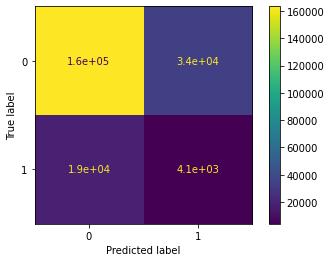

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=xgb_test.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_test.classes_)
disp.plot() 

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb_test.predict_proba(X_test)[:, 1])

0.5952508131175192

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.1328246017381663

In [ ]:
y_pred_prob = pd.DataFrame()
y_pred_prob['%'] = list(xgb_test.predict_proba(X_test)[:, 1])

In [ ]:
y_pred_prob['actual'] = list(y_test)
y_pred_prob['3_day_change'] = X_test_keep['3_day_change'].tolist()
y_pred_prob['tic'] = X_test_keep['tic'].tolist()
y_pred_prob['datadate'] = X_test_keep['datadate'].tolist()

In [ ]:
test = y_pred_prob[y_pred_prob['%'] > 0.5]

In [ ]:
test[test['actual'] == 0]

,%,actual,3_day_change,tic,datadate
11,0.999999,0,-0.021459,PLUG,2019-07-17
19,0.516611,0,-0.044444,PLUG,2019-07-29
61,0.591419,0,-0.052830,PLUG,2019-09-26
184,0.506197,0,-0.048984,PENN,2019-09-24
212,0.558291,0,0.013290,PENN,2019-11-01
...,...,...,...,...,...
220587,1.000000,0,-0.052179,ARL,2019-11-01
220593,1.000000,0,-0.019934,ARL,2019-11-11
220600,0.999999,0,-0.053701,ARL,2019-11-20
220601,0.515520,0,-0.015256,ARL,2019-11-21


In [ ]:
test[test['actual'] == 1]

,%,actual,3_day_change,tic,datadate
269,0.818858,1,0.091346,NVAX,2019-07-29
273,0.546401,1,0.064516,NVAX,2019-08-02
278,0.515779,1,0.455422,NVAX,2019-08-09
281,0.572160,1,0.206954,NVAX,2019-08-14
300,0.682464,1,0.318815,NVAX,2019-09-11
...,...,...,...,...,...
220533,0.999985,1,0.072489,ARL,2019-08-16
220547,0.888479,1,0.104285,ARL,2019-09-06
220577,0.999999,1,0.064426,ARL,2019-10-18
220608,1.000000,1,0.055382,ARL,2019-12-03


In [ ]:
feature_imp = pd.DataFrame()
feature_imp['features'] = list(xgb_test.get_booster().feature_names)
feature_imp['%'] = list(xgb_test.feature_importances_)

In [ ]:
feature_imp.sort_values(by=['%'],ascending=False).head(20)

,features,%
392,niy,0.070827
377,dvy,0.020438
396,oiadpy,0.012959
395,oepsxy,0.012724
351,pe_op_basic,0.011549
2,eps,0.010162
408,vix,0.008528
113,98,0.008062
8,g1,0.007669
406,sp500,0.007602


## Analysis of our strategy

In [ ]:
test[test['3_day_change'] < 0].sort_values(by=['3_day_change'],ascending=True)

,%,actual,3_day_change,tic,datadate
213709,0.540017,0,-0.817573,CYCN,2019-10-29
213708,1.000000,0,-0.782530,CYCN,2019-10-28
213707,1.000000,0,-0.749088,CYCN,2019-10-25
152725,1.000000,0,-0.746667,CBAY,2019-11-20
182466,0.750992,0,-0.744102,SLDB,2019-11-07
...,...,...,...,...,...
82312,0.999990,0,-0.000144,HSKA,2019-09-27
147996,0.999984,0,-0.000143,BFC,2019-12-20
140608,0.999246,0,-0.000115,NPK,2019-12-03
23387,0.999879,0,-0.000105,UNF,2019-07-18


In [ ]:
test[test['3_day_change'] >= 0].sort_values(by=['3_day_change'],ascending=False)

,%,actual,3_day_change,tic,datadate
218732,1.000000,1,8.363296,NMRD,2019-12-02
218733,1.000000,1,7.642545,NMRD,2019-12-03
142957,1.000000,1,2.827957,ISEE,2019-10-25
28478,0.651728,1,2.763027,CCXI,2019-11-25
28477,0.586104,1,2.748111,CCXI,2019-11-22
...,...,...,...,...,...
152001,1.000000,0,0.000000,DJCO,2019-07-02
152000,0.999999,0,0.000000,DJCO,2019-07-01
185742,1.000000,0,0.000000,CASI,2019-12-16
109273,0.999998,0,0.000000,CLBK,2019-08-02


## Trading

In [ ]:
X_test_change = X_test_keep[['tic', 'datadate', '3_day_change']]

In [ ]:
# get trading days
trading_days = X_test_keep.drop_duplicates(subset=['datadate']).sort_values(by='datadate')['datadate'].tolist()

In [ ]:
# invest and send out trading return (or loss)
def invest(X_test_keep,xgb,fund,tday):
  X_info = X_test_keep[X_test_keep['datadate'] == tday]
  X_input = X_info.drop(columns = ['tic','datadate','3_day_change'])
  X_pc = X_info[['tic','datadate','3_day_change']]
  # run model to make investment decision
  X_pc['%'] = list(xgb.predict_proba(X_input)[:, 1])
  # invest policy: model confidence > 50% 
  invested = X_pc[X_pc['%'] > 0.5]
  # calculate return 
  if len(invested) > 0:
    fund_part = fund/len(invested)
    fund_after = 0
    for i in range(len(invested)):
      change = invested['3_day_change'].iloc[i]
      fund_after = fund_after + fund_part * (1+change)
    fund = fund_after
  else:
    fund = fund
  return fund

In [ ]:
import warnings
warnings.filterwarnings('ignore')

total = 1000000
# simulation of tradings
fund1 = total/3
fund2 = total/3
fund3 = total/3
counter = 1
record1 = list()
record2 = list()
record3= list()
record_day = list()
for tday in trading_days:
  if (counter-1)%3 == 0:
    fund1 = invest(X_test_keep,xgb_test,fund1,tday)
  if (counter-2)%3 == 0:
    fund2 = invest(X_test_keep,xgb_test,fund2,tday)
  if (counter)%3 == 0:
    fund3 = invest(X_test_keep,xgb_test,fund3,tday)
  record_day.append(tday)
  record1.append(fund1)
  record2.append(fund2)
  record3.append(fund3)
  counter+=1
  print("{} --- fund1: {}, fund2: {}, fund3: {}".format(tday,fund1,fund2,fund3))

2019-07-01 00:00:00 --- fund1: 333938.6755952247, fund2: 333333.3333333333, fund3: 333333.3333333333
2019-07-02 00:00:00 --- fund1: 333938.6755952247, fund2: 333323.5137650605, fund3: 333333.3333333333
2019-07-03 00:00:00 --- fund1: 333938.6755952247, fund2: 333323.5137650605, fund3: 331348.0942402268
2019-07-05 00:00:00 --- fund1: 331125.78478795383, fund2: 333323.5137650605, fund3: 331348.0942402268
2019-07-08 00:00:00 --- fund1: 331125.78478795383, fund2: 332410.70983795833, fund3: 331348.0942402268
2019-07-09 00:00:00 --- fund1: 331125.78478795383, fund2: 332410.70983795833, fund3: 331819.19197463366
2019-07-10 00:00:00 --- fund1: 328268.57610602403, fund2: 332410.70983795833, fund3: 331819.19197463366
2019-07-11 00:00:00 --- fund1: 328268.57610602403, fund2: 331748.9447736133, fund3: 331819.19197463366
2019-07-12 00:00:00 --- fund1: 328268.57610602403, fund2: 331748.9447736133, fund3: 328999.09482529544
2019-07-15 00:00:00 --- fund1: 327101.2106460247, fund2: 331748.9447736133, fu

In [ ]:
invest_result = pd.DataFrame()
invest_result['d'] = record_day
invest_result['1'] = record1
invest_result['2'] = record2
invest_result['3'] = record3

In [ ]:
invest_result

,d,1,2,3
0,2019-07-01,333938.675595,333333.333333,333333.333333
1,2019-07-02,333938.675595,333323.513765,333333.333333
2,2019-07-03,333938.675595,333323.513765,331348.094240
3,2019-07-05,331125.784788,333323.513765,331348.094240
4,2019-07-08,331125.784788,332410.709838,331348.094240
...,...,...,...,...
120,2019-12-19,381813.149981,386289.722741,376423.354366
121,2019-12-20,381813.149981,392517.561009,376423.354366
122,2019-12-23,381813.149981,392517.561009,377624.736748
123,2019-12-24,378652.178721,392517.561009,377624.736748


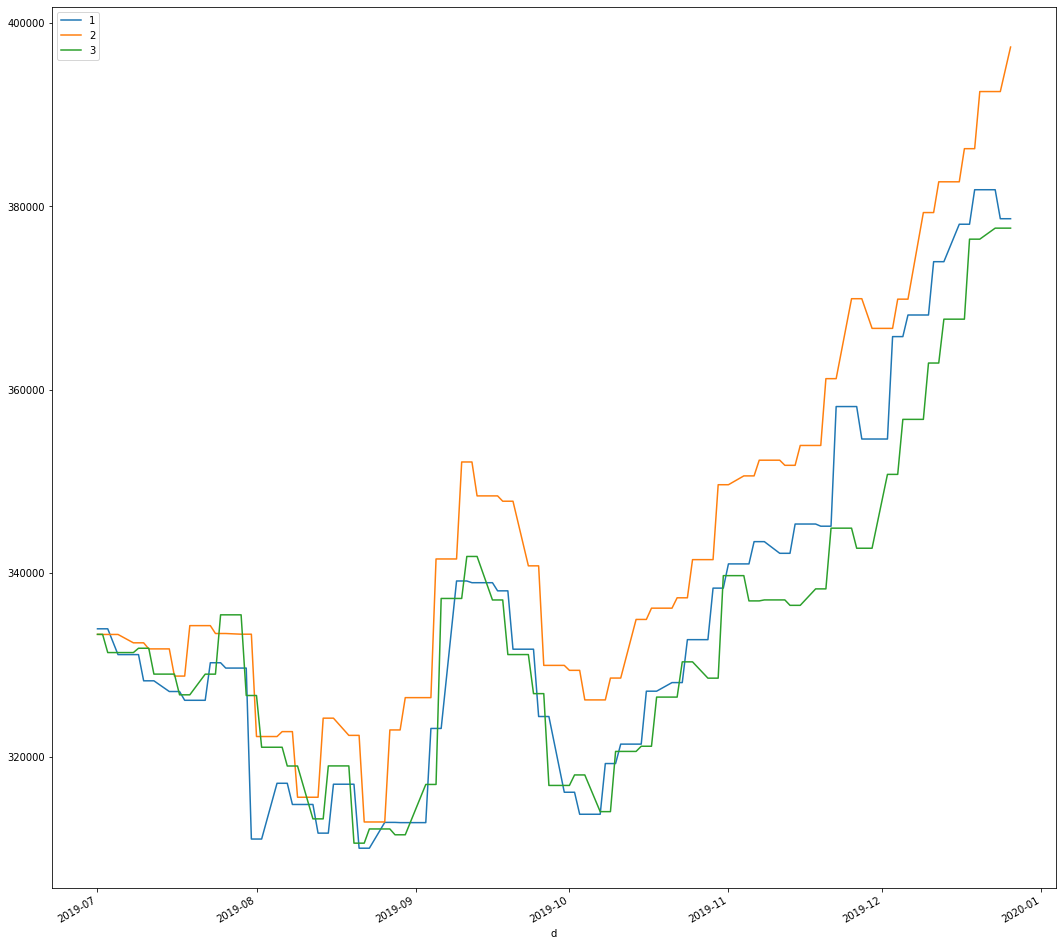

In [ ]:
invest_result.plot(x='d',y=['1','2','3'],figsize = (18,18))

In [ ]:
(fund1+fund2+fund3)/total - 1

0.15364822059054473

In [ ]:
fund1+fund2+fund3

1153648.2205905446

## Index return comparison

In [ ]:
rus2000 = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/iwm.csv')
rus2000 = rus2000[['datadate','prccd']]

In [ ]:
# datetime transform 
rus2000['datadate'] = pd.to_datetime(rus2000['datadate'],format='%Y%m%d')

In [ ]:
start = datetime.strptime("2019-07-01","%Y-%m-%d")
end = datetime.strptime("2019-12-26","%Y-%m-%d")
start_p = rus2000[rus2000['datadate'] == start]['prccd'].iloc[0]
end_p = rus2000[rus2000['datadate'] == end]['prccd'].iloc[0]

In [ ]:
(end_p-start_p)/start_p

0.0677770659833441

In [ ]:
invest_result = invest_result.merge(rus2000, how='left', left_on='d', right_on='datadate')
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# invest_result[['1','2','3','prccd']] = scaler.fit_transform(invest_result[['1','2','3','prccd']])
invest_result['Fund1'] = invest_result['1'].apply(lambda x: x/(total/3))
invest_result['Fund2'] = invest_result['2'].apply(lambda x: x/(total/3))
invest_result['Fund3'] = invest_result['3'].apply(lambda x: x/(total/3))
invest_result['Russell2000'] = invest_result['prccd'].apply(lambda x: x/start_p)
invest_result

,d,1,2,3,datadate,prccd,Fund1,Fund2,Fund3,Russell2000
0,2019-07-01,333938.675595,333333.333333,333333.333333,2019-07-01,156.10,1.001816,1.000000,1.000000,1.000000
1,2019-07-02,333938.675595,333323.513765,333333.333333,2019-07-02,155.15,1.001816,0.999971,1.000000,0.993914
2,2019-07-03,333938.675595,333323.513765,331348.094240,2019-07-03,156.26,1.001816,0.999971,0.994044,1.001025
3,2019-07-05,331125.784788,333323.513765,331348.094240,2019-07-05,156.68,0.993377,0.999971,0.994044,1.003716
4,2019-07-08,331125.784788,332410.709838,331348.094240,2019-07-08,155.19,0.993377,0.997232,0.994044,0.994170
...,...,...,...,...,...,...,...,...,...,...
120,2019-12-19,381813.149981,386289.722741,376423.354366,2019-12-19,165.73,1.145439,1.158869,1.129270,1.061691
121,2019-12-20,381813.149981,392517.561009,376423.354366,2019-12-20,165.97,1.145439,1.177553,1.129270,1.063229
122,2019-12-23,381813.149981,392517.561009,377624.736748,2019-12-23,166.30,1.145439,1.177553,1.132874,1.065343
123,2019-12-24,378652.178721,392517.561009,377624.736748,2019-12-24,166.68,1.135957,1.177553,1.132874,1.067777


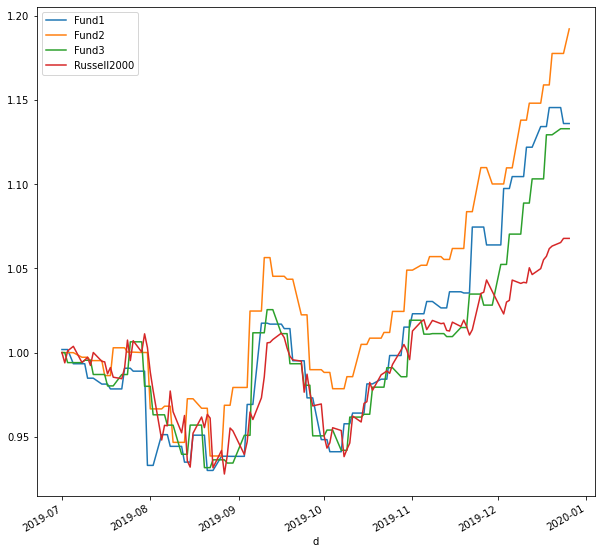

In [ ]:
invest_result.plot(x='d',y=['Fund1','Fund2','Fund3','Russell2000'],figsize = (10,10))

## XGB for shorting (not completed)

In [ ]:
# setting y

result['y'] = result['3_day_change'].apply(lambda x: 1 if x<=-0.05 else 0)
result_test['y'] = result_test['3_day_change'].apply(lambda x: 1 if x<=-0.05 else 0)

In [ ]:
print(len(result_test[result_test['y'] == 0]))
print(len(result_test[result_test['y'] == 1]))
print(len(result_test[result_test['y'] == 2]))

232822
23103
0


### Clean train and test data

In [ ]:
# train and test data
train = result
test = result_test

# train
X_train = train.drop(columns=['prccd','y'])            
y_train = train['y']

#test
X_test = test.drop(columns=['prccd','y'])            
y_test = test['y']

# keep tic, datadate, 3_day_change columns in X train and test
X_train_keep = X_train.copy()
X_test_keep = X_test.copy()

X_train = X_train.drop(columns = ['tic', 'datadate', '3_day_change'])
X_test = X_test.drop(columns = ['tic', 'datadate', '3_day_change'])

from collections import Counter
print('Resampled dataset shape %s' % Counter(y_test))

Resampled dataset shape Counter({0: 232822, 1: 23103})


### XGBoost

In [ ]:
xgb_test2 = XGBClassifier(tree_method = "gpu_hist",n_estimators = 18888, random_state=7012,
                    # verbose_eval=True, 
                    # eval_metric = 'aucpr', early_stopping_rounds = 88, 
                    # eval_set = [(X_train, y_train), 
                    #             (X_test, y_test)]
                    )
xgb_test2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=18888, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=7012,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
y_pred = xgb_test2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7647904659568233

In [ ]:
print(len(y_test[y_test == 0]))
print(len(y_test[y_test == 1]))
print(len(y_test[y_test== 2]))

232822
23103
0


In [ ]:
print(len(y_pred[y_pred == 0]))
print(len(y_pred[y_pred == 1]))
print(len(y_pred[y_pred== 2]))

211610
44315
0


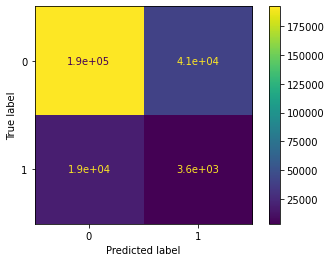

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=xgb_test2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_test2.classes_)
disp.plot() 

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb_test2.predict_proba(X_test)[:, 1])

0.6003343125653431

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.10712272686819543

In [ ]:
y_pred_prob = pd.DataFrame()
y_pred_prob['%'] = list(xgb_test2.predict_proba(X_test)[:, 1])

In [ ]:
y_pred_prob['actual'] = list(y_test)
y_pred_prob['3_day_change'] = X_test_keep['3_day_change'].tolist()
y_pred_prob['tic'] = X_test_keep['tic'].tolist()
y_pred_prob['datadate'] = X_test_keep['datadate'].tolist()

In [ ]:
test = y_pred_prob[y_pred_prob['%'] > 0.5]

In [ ]:
test[test['actual'] == 0]

,%,actual,3_day_change,tic,datadate
31,0.999870,0,-0.021459,PLUG,2019-07-17
123,0.502614,0,0.054054,PLUG,2019-11-25
132,0.633770,0,0.046667,PLUG,2019-12-09
133,0.551189,0,0.006515,PLUG,2019-12-10
140,0.635449,0,0.061433,PLUG,2019-12-19
...,...,...,...,...,...
255877,0.999739,0,0.064426,ARL,2019-10-18
255893,0.997748,0,-0.019934,ARL,2019-11-11
255908,0.997384,0,0.055382,ARL,2019-12-03
255910,0.999834,0,0.025547,ARL,2019-12-05


In [ ]:
test[test['actual'] == 1]

,%,actual,3_day_change,tic,datadate
127,0.519407,1,-0.186842,PLUG,2019-12-02
128,0.581096,1,-0.068047,PLUG,2019-12-03
293,0.669808,1,-0.138514,NVAX,2019-06-06
343,0.707680,1,-0.128827,NVAX,2019-08-16
351,0.549675,1,-0.078778,NVAX,2019-08-28
...,...,...,...,...,...
255825,0.998851,1,-0.158859,ARL,2019-08-06
255826,0.999102,1,-0.122268,ARL,2019-08-07
255861,0.998349,1,-0.053165,ARL,2019-09-26
255887,0.999702,1,-0.052179,ARL,2019-11-01


In [ ]:
feature_imp = pd.DataFrame()
feature_imp['features'] = list(xgb_test2.get_booster().feature_names)
feature_imp['%'] = list(xgb_test2.feature_importances_)

In [ ]:
feature_imp.sort_values(by=['%'],ascending=False).head(20)

### Analysis of our strategy

In [ ]:
test[test['3_day_change'] < 0].sort_values(by=['3_day_change'],ascending=True)

,%,actual,3_day_change,tic,datadate
247908,0.999994,1,-0.782530,CYCN,2019-10-28
247907,0.999995,1,-0.749088,CYCN,2019-10-25
177165,0.999978,1,-0.746667,CBAY,2019-11-20
170411,0.998594,1,-0.693841,LXRX,2019-07-24
233493,0.598594,1,-0.650602,GLYC,2019-08-02
...,...,...,...,...,...
95492,0.999941,0,-0.000144,HSKA,2019-09-27
171676,0.998621,0,-0.000143,BFC,2019-12-20
163108,0.993808,0,-0.000115,NPK,2019-12-03
27147,0.998298,0,-0.000105,UNF,2019-07-18


In [ ]:
test[test['3_day_change'] >= 0].sort_values(by=['3_day_change'],ascending=False)

,%,actual,3_day_change,tic,datadate
253732,0.999992,0,8.363296,NMRD,2019-12-02
253733,0.999992,0,7.642545,NMRD,2019-12-03
165837,0.999751,0,2.827957,ISEE,2019-10-25
136883,0.999925,0,2.004988,PRVB,2019-06-06
4223,0.691812,0,1.917772,FCEL,2019-06-27
...,...,...,...,...,...
70185,0.999161,0,0.000000,SAVA,2019-06-10
244739,0.583741,0,0.000000,AGTC,2019-11-26
244624,0.975402,0,0.000000,AGTC,2019-06-14
98861,0.999962,0,0.000000,PTEN,2019-11-14


## Trading (with shorting strategy)

In [ ]:
X_test_change = X_test_keep[['tic', 'datadate', '3_day_change']]

In [ ]:
# get trading days
trading_days = X_test_keep.drop_duplicates(subset=['datadate']).sort_values(by='datadate')['datadate'].tolist()

In [ ]:
# invest and send out trading return (or loss)
def invest(X_test_keep,xgb,fund,tday):
  X_info = X_test_keep[X_test_keep['datadate'] == tday]
  X_input = X_info.drop(columns = ['tic','datadate','3_day_change'])
  X_pc = X_info[['tic','datadate','3_day_change']]
  # run model to make investment decision
  X_pc['%'] = list(xgb.predict_proba(X_input)[:, 1])
  # invest policy: model confidence > 50% 
  invested = X_pc[X_pc['%'] > 0.5]
  # calculate return 
  if len(invested) > 0:
    fund_part = fund/len(invested)
    fund_after = 0
    for i in range(len(invested)):
      change = invested['3_day_change'].iloc[i]
      fund_after = fund_after + fund_part * (1+change)
    fund = fund_after
  else:
    fund = fund
  return fund

# shorting version of invest
def short(X_test_keep,xgb,fund,tday):
  X_info = X_test_keep[X_test_keep['datadate'] == tday]
  X_input = X_info.drop(columns = ['tic','datadate','3_day_change'])
  X_pc = X_info[['tic','datadate','3_day_change']]
  # run model to make investment decision
  X_pc['%'] = list(xgb.predict_proba(X_input)[:, 1])
  # invest policy: model confidence > 50% 
  invested = X_pc[X_pc['%'] > 0.5]
  # calculate return 
  if len(invested) > 0:
    fund_part = fund/len(invested)
    fund_after = 0
    for i in range(len(invested)):
      change = invested['3_day_change'].iloc[i]
      ### when the change is negative we gain
      fund_after = fund_after + fund_part * (1-change)
    fund = fund_after
  else:
    fund = fund
  return fund

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# simulation of tradings
fund1 = 10000
fund2 = 10000
fund3 = 10000
fund4 = 10000
fund5 = 10000
fund6 = 10000
counter = 1
record1 = list()
record2 = list()
record3= list()
record4= list()
record5= list()
record6= list()
record_day = list()
for tday in trading_days:
  if (counter-1)%3 == 0:
    fund1 = invest(X_test_keep,xgb_test,fund1,tday)
    fund4 = short(X_test_keep,xgb_test2,fund4,tday)
  if (counter-2)%3 == 0:
    fund2 = invest(X_test_keep,xgb_test,fund2,tday)
    fund5 = short(X_test_keep,xgb_test2,fund5,tday)
  if (counter)%3 == 0:
    fund3 = invest(X_test_keep,xgb_test,fund3,tday)
    fund6 = short(X_test_keep,xgb_test2,fund6,tday)
  record_day.append(tday)
  record1.append(fund1)
  record2.append(fund2)
  record3.append(fund3)
  record4.append(fund4)
  record5.append(fund5)
  record6.append(fund6)
  counter+=1
  print("{} --- fund1: {}, fund2: {}, fund3: {}, fund4: {}, fund5: {}, fund6: {}".format(tday,fund1,fund2,fund3,fund4,fund5,fund6))

2019-06-03 00:00:00 --- fund1: 10098.765488423121, fund2: 10000, fund3: 10000, fund4: 9900.836405128166, fund5: 10000, fund6: 10000
2019-06-04 00:00:00 --- fund1: 10098.765488423121, fund2: 9962.055305556283, fund3: 10000, fund4: 9900.836405128166, fund5: 10062.56511179037, fund6: 10000
2019-06-05 00:00:00 --- fund1: 10098.765488423121, fund2: 9962.055305556283, fund3: 10105.643913833555, fund4: 9900.836405128166, fund5: 10062.56511179037, fund6: 9898.079488507483
2019-06-06 00:00:00 --- fund1: 10291.303715233378, fund2: 9962.055305556283, fund3: 10105.643913833555, fund4: 9740.690519332335, fund5: 10062.56511179037, fund6: 9898.079488507483
2019-06-07 00:00:00 --- fund1: 10291.303715233378, fund2: 10057.519700483475, fund3: 10105.643913833555, fund4: 9740.690519332335, fund5: 9969.695394453986, fund6: 9898.079488507483
2019-06-10 00:00:00 --- fund1: 10291.303715233378, fund2: 10057.519700483475, fund3: 10201.028557035506, fund4: 9740.690519332335, fund5: 9969.695394453986, fund6: 9817

In [ ]:
invest_result = pd.DataFrame()
invest_result['d'] = record_day
invest_result['1'] = record1
invest_result['2'] = record2
invest_result['3'] = record3
invest_result['4'] = record4
invest_result['5'] = record5
invest_result['6'] = record6

In [ ]:
invest_result

,d,1,2,3,4,5,6
0,2019-06-03,10098.765488,10000.000000,10000.000000,9900.836405,10000.000000,10000.000000
1,2019-06-04,10098.765488,9962.055306,10000.000000,9900.836405,10062.565112,10000.000000
2,2019-06-05,10098.765488,9962.055306,10105.643914,9900.836405,10062.565112,9898.079489
3,2019-06-06,10291.303715,9962.055306,10105.643914,9740.690519,10062.565112,9898.079489
4,2019-06-07,10291.303715,10057.519700,10105.643914,9740.690519,9969.695394,9898.079489
...,...,...,...,...,...,...,...
140,2019-12-19,12294.889788,11817.237877,12055.193657,8420.588311,8658.298235,8222.546780
141,2019-12-20,12493.110400,11817.237877,12055.193657,8311.720942,8658.298235,8222.546780
142,2019-12-23,12493.110400,11854.953447,12055.193657,8311.720942,8626.225716,8222.546780
143,2019-12-24,12493.110400,11854.953447,11955.390597,8311.720942,8626.225716,8281.798423


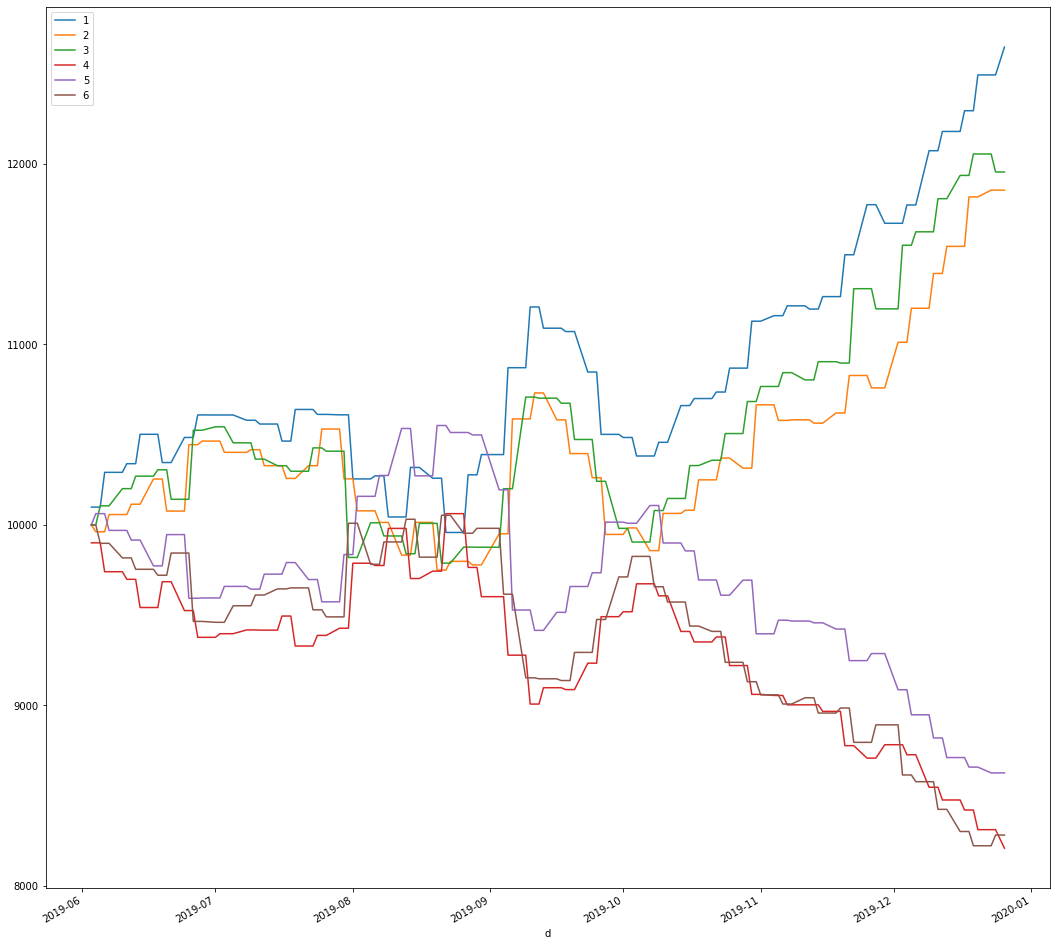

In [ ]:
invest_result.plot(x='d',y=['1','2','3','4','5','6'],figsize = (18,18))

In [ ]:
(fund1+fund2+fund3+fund4+fund5+fund6)/60000 - 1

0.026249057863294123

## Index return comparison (with shorting)

In [ ]:
rus2000 = pd.read_csv('/content/drive/MyDrive/Social Media Group /Data/iwm.csv')
rus2000 = rus2000[['datadate','prccd']]

In [ ]:
# datetime transform 
rus2000['datadate'] = pd.to_datetime(rus2000['datadate'],format='%Y%m%d')

In [ ]:
start = datetime.strptime("2019-06-03","%Y-%m-%d")
end = datetime.strptime("2019-12-26","%Y-%m-%d")
start_p = rus2000[rus2000['datadate'] == start]['prccd'].iloc[0]
end_p = rus2000[rus2000['datadate'] == end]['prccd'].iloc[0]

In [ ]:
(end_p-start_p)/start_p

0.13875794220127077

In [ ]:
invest_result = invest_result.merge(rus2000, how='left', left_on='d', right_on='datadate')
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# invest_result[['1','2','3','prccd']] = scaler.fit_transform(invest_result[['1','2','3','prccd']])
invest_result['Fund1'] = invest_result['1'].apply(lambda x: x/10000)
invest_result['Fund2'] = invest_result['2'].apply(lambda x: x/10000)
invest_result['Fund3'] = invest_result['3'].apply(lambda x: x/10000)
invest_result['Fund4'] = invest_result['4'].apply(lambda x: x/10000)
invest_result['Fund5'] = invest_result['5'].apply(lambda x: x/10000)
invest_result['Fund6'] = invest_result['6'].apply(lambda x: x/10000)
invest_result['Russell2000'] = invest_result['prccd'].apply(lambda x: x/start_p)
invest_result

,d,1,2,3,4,5,6,datadate,prccd,Fund1,Fund2,Fund3,Fund4,Fund5,Fund6,Russell2000
0,2019-06-03,10098.765488,10000.000000,10000.000000,9900.836405,10000.000000,10000.000000,2019-06-03,146.37,1.009877,1.000000,1.000000,0.990084,1.000000,1.000000,1.000000
1,2019-06-04,10098.765488,9962.055306,10000.000000,9900.836405,10062.565112,10000.000000,2019-06-04,150.16,1.009877,0.996206,1.000000,0.990084,1.006257,1.000000,1.025893
2,2019-06-05,10098.765488,9962.055306,10105.643914,9900.836405,10062.565112,9898.079489,2019-06-05,150.19,1.009877,0.996206,1.010564,0.990084,1.006257,0.989808,1.026098
3,2019-06-06,10291.303715,9962.055306,10105.643914,9740.690519,10062.565112,9898.079489,2019-06-06,149.80,1.029130,0.996206,1.010564,0.974069,1.006257,0.989808,1.023434
4,2019-06-07,10291.303715,10057.519700,10105.643914,9740.690519,9969.695394,9898.079489,2019-06-07,150.86,1.029130,1.005752,1.010564,0.974069,0.996970,0.989808,1.030676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2019-12-19,12294.889788,11817.237877,12055.193657,8420.588311,8658.298235,8222.546780,2019-12-19,165.73,1.229489,1.181724,1.205519,0.842059,0.865830,0.822255,1.132268
141,2019-12-20,12493.110400,11817.237877,12055.193657,8311.720942,8658.298235,8222.546780,2019-12-20,165.97,1.249311,1.181724,1.205519,0.831172,0.865830,0.822255,1.133907
142,2019-12-23,12493.110400,11854.953447,12055.193657,8311.720942,8626.225716,8222.546780,2019-12-23,166.30,1.249311,1.185495,1.205519,0.831172,0.862623,0.822255,1.136162
143,2019-12-24,12493.110400,11854.953447,11955.390597,8311.720942,8626.225716,8281.798423,2019-12-24,166.68,1.249311,1.185495,1.195539,0.831172,0.862623,0.828180,1.138758


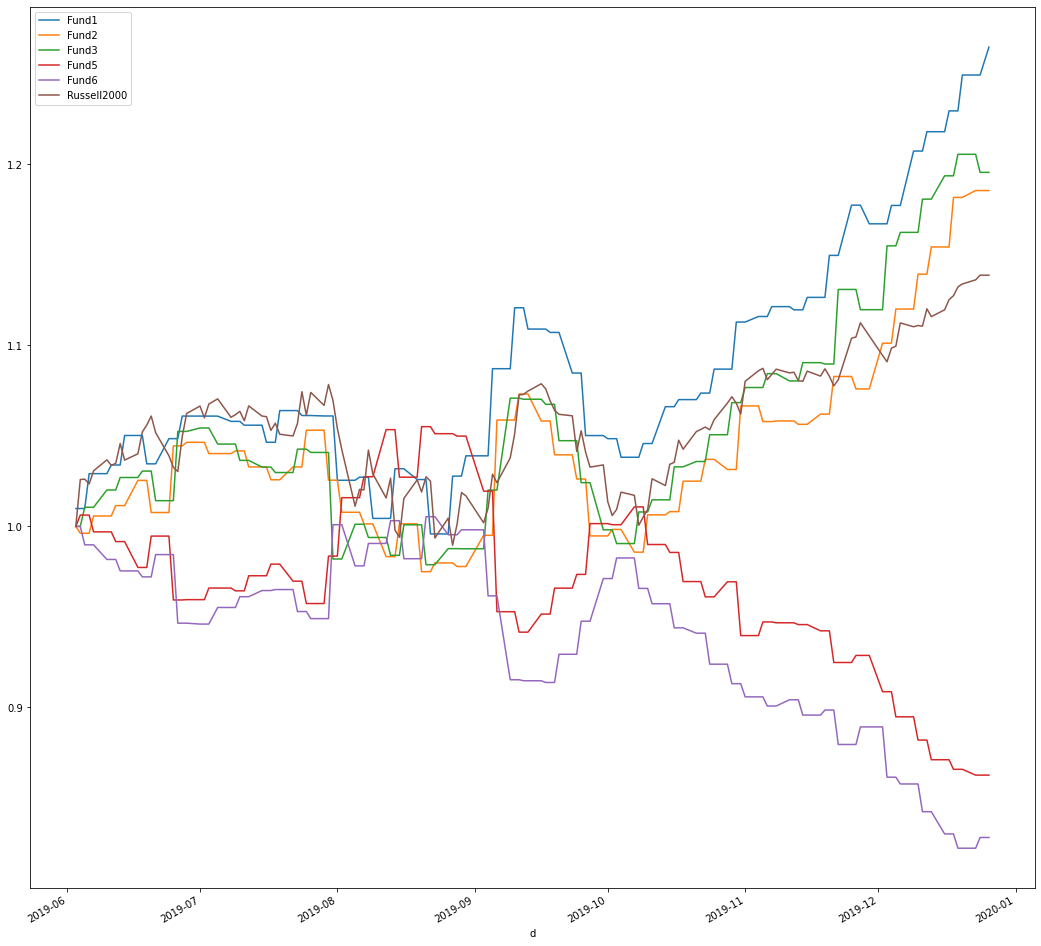

In [ ]:
invest_result.plot(x='d',y=['Fund1','Fund2','Fund3','Fund5','Fund6','Russell2000'],figsize = (18,18))